# Resumen de los datos, dimensiones y estructuras

In [101]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [12]:
mainpath = "/Users/Lenovo/Documents/Python Scripts/python-ml-course-master/datasets"
filename = "titanic/titanic3.csv"
fullpath = os.path.join(mainpath, filename)

In [13]:
data = pd.read_csv(fullpath)

In [19]:
data.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Si nosotros tenemos problemas para cargar la base, y sabemos que lo tenemos en un repositorio de Github, solo tenemos que ir a la ubicacion url, entrar al dataset y seleccionar la opcion Raw, copiar la url y copiarla para despues guardarla y ocuparla, tal y como leemos todas las urls.

In [20]:
url2 = "https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/titanic/titanic_custom.csv"

In [21]:
df2 = pd.read_csv(url2)

In [22]:
df2.head(3)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Empezando a analizar nuestro dataset

In [23]:
data.shape

(1309, 14)

1309 filas y 14 columnas (o variables)

In [24]:
data.columns.values

array(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype=object)

Obtenemos los nombres de las variables

##### Estadisticas Basicas

.describe() es similar a summary en R

In [25]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [26]:
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

*dtypes = data types es similar a str en R* 

### Missing Values

In [27]:
pd.isnull(data["body"])

0        True
1        True
2        True
3       False
4        True
        ...  
1304    False
1305     True
1306    False
1307     True
1308     True
Name: body, Length: 1309, dtype: bool

Las primeras 3 columnas en la variable body son NaN y eso se puede corroborar con un head

In [28]:
pd.notnull(data["body"])

0       False
1       False
2       False
3        True
4       False
        ...  
1304     True
1305    False
1306     True
1307    False
1308    False
Name: body, Length: 1309, dtype: bool

In [29]:
pd.notnull(data["body"]).values.ravel().sum()

121

Esta es la suma de los Nulls

In [30]:
pd.isnull(data["body"]).values.ravel().sum()

1188

Esta es la suma de los valores que no son NaN

.values - convierte en valores de array

.ravel hace que no se cuenten valores encimados, sino una unica fila

.sum - aplico la funcion sum

Los valores que faltan en un data set se pueden venir por 2 razones
* Extraccion de los datos
* Recoleccion de los datos

### Cuando hacen falta valores en el dataset 

##### Borrado de valores que faltan 

In [31]:
data.dropna(axis=0, how="all")

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


dropna -> para borrar los NA's

Axis -> Eje -> en este caso los valores son 1 o 0

1 - borrar toda la columna (toda la variable) -> peligroso

0 - borrar solo la fila (toda esa observacion con las demas variables)

how = "all" -> caso menos restrictivo -> borrarla las filas que TODAS sus variables tenga NA's

how ="any", si alguna de las columnas tiene un NA, elimina toda la fila. -> caso más drastico

In [32]:
data2 = data

In [33]:
data2.dropna(axis = 0, how="any")

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


No existe ni un solo elemento que no tenga alguna NA en su columna.  

### Cómputo de los valores faltantes

Ejemplo -> rellenar todos los valores que faltan con 0's

In [34]:
data3 = data

In [35]:
data3 = data3.fillna(0)
data3.tail(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,0,C,0,328.0,0
1305,3,0,"Zabour, Miss. Thamine",female,0.0,1,0,2665,14.4542,0,C,0,0.0,0
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,0,C,0,304.0,0
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,0,C,0,0.0,0
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,0,S,0,0.0,0


No puede ser el mejor metodo, porque, por ejemplo, de que nos sirve Edad = 0 (?), de nada, hay que ser cautelosos.

In [36]:
data4 = data

In [37]:
data4 = data4.fillna("Desconocido")

In [38]:
data5 = data

In [39]:
data5["body"] = data5["body"].fillna(0)
data5["home.dest"] = data5["home.dest"].fillna("Desconocido")
data5.tail(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,Desconocido
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,0.0,Desconocido
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,Desconocido
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,0.0,Desconocido
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,0.0,Desconocido


#### Imputar los valores faltantes por la media

In [40]:
pd.isnull(data5["age"]).values.ravel().sum()

263

In [41]:
data5["age"].fillna(data["age"].mean())

0       29.000000
1        0.916700
2        2.000000
3       30.000000
4       25.000000
          ...    
1304    14.500000
1305    29.881135
1306    26.500000
1307    27.000000
1308    29.000000
Name: age, Length: 1309, dtype: float64

Se han remplazado los valores por la media de Age

#### Reemplazar los valores faltantes por los más cercanos

In [42]:
data5["age"][1291]

nan

In [43]:
data5["age"] = data5["age"].fillna(method="ffill")

In [44]:
data5["age"][1291]

47.0

Toma el primer valor hacia adelante, dado que el metodo es forward fill, pero tambien se puede hacer hacia atras con back fill.

In [45]:
data5["age"].fillna(method="bfill")

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305    14.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

In [46]:
data["sex"]

0       female
1         male
2       female
3         male
4       female
         ...  
1304    female
1305    female
1306      male
1307      male
1308      male
Name: sex, Length: 1309, dtype: object

Esto es una serie categorica, y por ende la podemos hacer una variable dummy

#### Variables Dummy

In [47]:
dummy_sex = pd.get_dummies(data["sex"], prefix="sex")

In [49]:
dummy_sex.head(5)

,sex_female,sex_male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


Debemos eliminar las variables originales y añadir las dummys

In [52]:
data.columns.values.tolist()

['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

In [54]:
data = data.drop(["sex"], axis=1)

In [55]:
data.columns.values.tolist()

['pclass',
 'survived',
 'name',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

In [57]:
data = pd.concat([data, dummy_sex], axis=1)

In [59]:
data.columns.values.tolist()

['pclass',
 'survived',
 'name',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest',
 'sex_female',
 'sex_male']

Axis = 1 es importantisimo porque modifica a nivel columna. 

    Vamos a crear una funcion que haga todo esto de manera automatica

In [60]:
def createDummies(df, var_name):
    dummy = pd.get_dummies(df[var_name], prefix=var_name)
    df = df.drop(var_name, axis=1)
    df = pd.concat([df, dummy], axis=1)
    return df

In [61]:
createDummies(data3, "sex")

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON",1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,S,0,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",14.5000,1,0,2665,14.4542,0,C,0,328.0,0,1,0
1305,3,0,"Zabour, Miss. Thamine",0.0000,1,0,2665,14.4542,0,C,0,0.0,0,1,0
1306,3,0,"Zakarian, Mr. Mapriededer",26.5000,0,0,2656,7.2250,0,C,0,304.0,0,0,1
1307,3,0,"Zakarian, Mr. Ortin",27.0000,0,0,2670,7.2250,0,C,0,0.0,0,0,1



## Visualización basica de un dataset: El Scatterplot

In [66]:
data_curch = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [67]:
data_curch.head(5)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [70]:
matplotlib inline

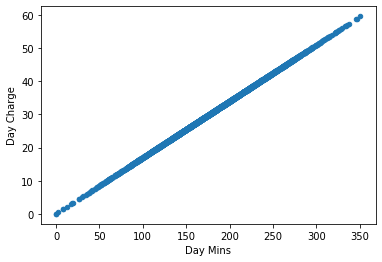

In [73]:
data_curch.plot(kind="scatter", x="Day Mins", y="Day Charge")

Encontramos una clara relación positiva entre los minutos y las horas de carga 

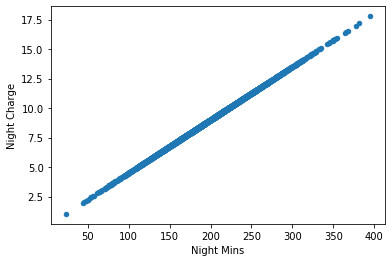

In [74]:
data_curch.plot(kind="scatter", x="Night Mins", y="Night Charge")

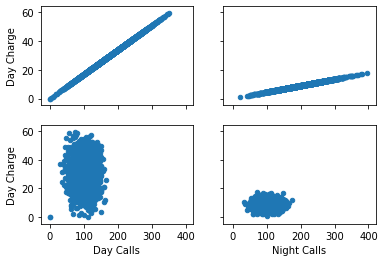

In [83]:
figure, axs = plt.subplots(2,2, sharey=True, sharex=True)
data_curch.plot(kind="scatter", x="Day Mins", y="Day Charge", ax=axs[0][0])
data_curch.plot(kind="scatter", x="Night Mins", y="Night Charge", ax=axs[0][1])
data_curch.plot(kind="scatter", x="Day Calls", y="Day Charge", ax=axs[1][0])
data_curch.plot(kind="scatter", x="Night Calls", y="Night Charge", ax=axs[1][1])

### Histograma de frecuencias

(array([2.000e+00, 1.000e+00, 1.900e+01, 1.160e+02, 4.690e+02, 9.170e+02,
        1.055e+03, 5.540e+02, 1.790e+02, 2.100e+01]),
 array([  0. ,  16.5,  33. ,  49.5,  66. ,  82.5,  99. , 115.5, 132. ,
        148.5, 165. ]),
 <a list of 10 Patch objects>)

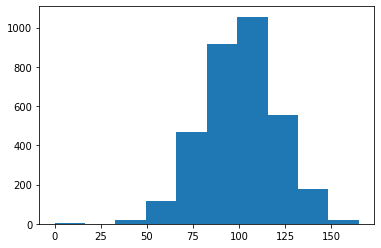

In [86]:
plt.hist(data_curch["Day Calls"])

Text(0.5, 1.0, 'Histograma de número de llamadas al día')

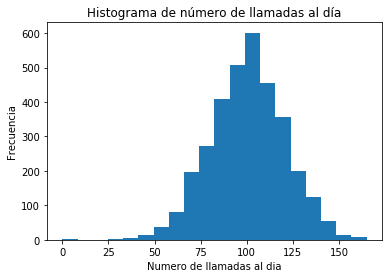

In [94]:
plt.hist(data_curch["Day Calls"], bins=20)
plt.xlabel("Numero de llamadas al dia")
plt.ylabel("Frecuencia")
plt.title("Histograma de número de llamadas al día")

Text(0.5, 1.0, 'Histograma de número de llamadas al día')

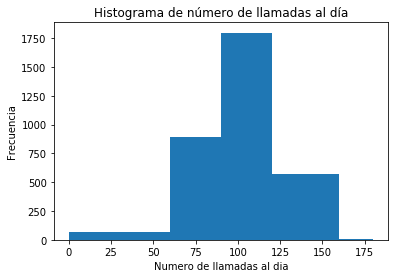

In [95]:
plt.hist(data_curch["Day Calls"], bins=[0, 60, 90, 120, 160, 180])
plt.xlabel("Numero de llamadas al dia")
plt.ylabel("Frecuencia")
plt.title("Histograma de número de llamadas al día")

#### Regla de Sturges

In [96]:
data_curch.shape

(3333, 21)

3333 obs y 21 variables

In [120]:
np.ceil(1+3.322*np.log10(3333))

13.0

Text(0.5, 1.0, 'Histograma de número de llamadas al día')

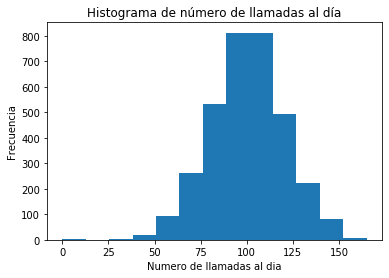

In [121]:
k = int(np.ceil(1+3.322*np.log10(3333)))
plt.hist(data_curch["Day Calls"], bins=k)
plt.xlabel("Numero de llamadas al dia")
plt.ylabel("Frecuencia")
plt.title("Histograma de número de llamadas al día")

### Boxplot

Text(0.5, 1.0, 'Boxplot de número de llamadas al día')

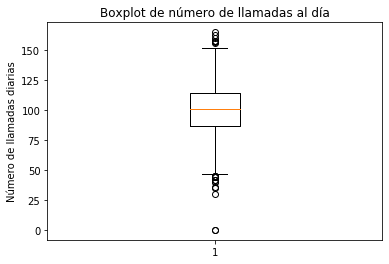

In [123]:
plt.boxplot(data_curch["Day Calls"])
plt.ylabel("Número de llamadas diarias")
plt.title("Boxplot de número de llamadas al día")

In [126]:
data_curch["Day Calls"].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

El boxplot nos resume en un grafico los datos de describe.

In [127]:
data_curch["Day Calls"].quantile(0.75)

114.0